### Import Libs

In [16]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [17]:
churn_df = pd.read_csv("customer_churn.csv")
churn_df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [18]:
churn_df.shape

(900, 10)

In [19]:
churn_df = churn_df[['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites', 'Churn']]
churn_df['Age'] = churn_df['Age'].astype('int')
churn_df['Total_Purchase'] = churn_df['Total_Purchase'].astype('int')
churn_df['Years'] = churn_df['Years'].astype('int')
churn_df['Num_Sites'] = churn_df['Num_Sites'].astype('int')
churn_df['Churn'] = churn_df['Churn'].astype('int')
churn_df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42,11066,0,7,8,1
1,41,11916,0,6,11,1
2,38,12884,0,6,12,1
3,42,8010,0,6,10,1
4,37,9191,0,5,9,1


In [20]:
churn_df.shape

(900, 6)

In [22]:
X = np.asarray(churn_df[['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites',]])
X[0:5]

array([[   42, 11066,     0,     7,     8],
       [   41, 11916,     0,     6,    11],
       [   38, 12884,     0,     6,    12],
       [   42,  8010,     0,     6,    10],
       [   37,  9191,     0,     5,     9]])

In [23]:
y = np.asarray(churn_df['Churn'])
y [0:5]

array([1, 1, 1, 1, 1])

In [24]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.0299361 ,  0.41693312, -0.96290958,  1.72185054, -0.33323478],
       [-0.13335172,  0.77002494, -0.96290958,  0.95354836,  1.36758544],
       [-0.6232152 ,  1.1721342 , -0.96290958,  0.95354836,  1.93452551],
       [ 0.0299361 , -0.8525358 , -0.96290958,  0.95354836,  0.80064537],
       [-0.78650303, -0.36194588, -0.96290958,  0.18524619,  0.2337053 ]])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (720, 5) (720,)
Test set: (180, 5) (180,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [27]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0])

In [28]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.56489705, 0.43510295],
       [0.49773108, 0.50226892],
       [0.79359309, 0.20640691],
       [0.82419354, 0.17580646],
       [0.74988834, 0.25011166],
       [0.75829175, 0.24170825],
       [0.78027254, 0.21972746],
       [0.83898965, 0.16101035],
       [0.70067455, 0.29932545],
       [0.85091734, 0.14908266],
       [0.70241269, 0.29758731],
       [0.84940437, 0.15059563],
       [0.42607739, 0.57392261],
       [0.79754718, 0.20245282],
       [0.56414748, 0.43585252],
       [0.87461234, 0.12538766],
       [0.79068441, 0.20931559],
       [0.46368309, 0.53631691],
       [0.68071612, 0.31928388],
       [0.76517926, 0.23482074],
       [0.54565591, 0.45434409],
       [0.81881875, 0.18118125],
       [0.8978245 , 0.1021755 ],
       [0.61654054, 0.38345946],
       [0.64758125, 0.35241875],
       [0.81199553, 0.18800447],
       [0.82702934, 0.17297066],
       [0.8156636 , 0.1843364 ],
       [0.79926894, 0.20073106],
       [0.78434512, 0.21565488],
       [0.

In [29]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.8674698795180723

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 14  16]
 [  6 144]]


Confusion matrix, without normalization
[[ 14  16]
 [  6 144]]


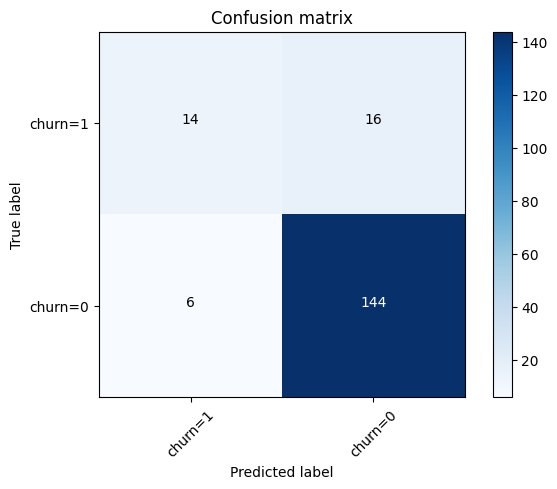

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [32]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       150
           1       0.70      0.47      0.56        30

    accuracy                           0.88       180
   macro avg       0.80      0.71      0.74       180
weighted avg       0.87      0.88      0.87       180


In [33]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.3791473217450155